In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo


In [2]:
print("Fetching Heart Diease dataset from UCI ML Respo")
heart_disease = fetch_ucirepo(id = 45)

Fetching Heart Diease dataset from UCI ML Respo


In [3]:
#extract data
x = heart_disease.data.features
y = heart_disease.data.targets

In [4]:
print("Dataset Information:")
print(f"features Shape:{x.shape}")
print(f"target Shape:{y.shape}")
print(f"\nFeature  columns:{list(x.columns)}")
print(f"\nFeature  columns{list(y.columns)}")

Dataset Information:
features Shape:(303, 13)
target Shape:(303, 1)

Feature  columns:['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Feature  columns['num']


In [5]:
#combine Features and targets into a single dataframe
df = pd.concat([x, y], axis=1)
df.shape

(303, 14)

In [6]:
#display info
print("Dataset Info:")
df.info()
print("First rows")
print(df.head())
print("Dataset descr")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
First rows
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#check misisng values
print("Missing values per column")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total: {missing_values.sum()}")


Missing values per column
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Total: 6


In [8]:
#target distribution and knowing its precentage
target_col = y.columns[0]
print(f"\nTarget variable({target_col})dist:")
print(df[target_col].value_counts())
print(f"Target Value count(%):")
print(df[target_col].value_counts(normalize =True)*100)



Target variable(num)dist:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
Target Value count(%):
num
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64


In [9]:
#coping the data frame to clean it 
print("Handling missing values..")
df_clean = df.copy()
#Handle missing values if any
# there is no categorical data so just checking numerical misses
if missing_values.sum()> 0:
    print("Missing values found , applying imputation....")
    numerical_cols = df_clean.select_dtypes(include = [np.number]).columns
    for col in numerical_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            # if there is a missing value it replaces it withe the median 
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"Filled {col} missing values with median:{median_val}")
else:
    print("No missing values Found.")
print(f"Dataset shape after handling missing values: {df_clean.shape}")
#update the main dataframe



Handling missing values..
Missing values found , applying imputation....
Filled ca missing values with median:0.0
Filled thal missing values with median:3.0
Dataset shape after handling missing values: (303, 14)


In [10]:
#convert target to binary if multi-class
target_col = y.columns[0]
unique_targets =df_clean[target_col].unique()
print(f"unique target values:{sorted(unique_targets)}")



unique target values:[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [11]:
if len(unique_targets)>2:
    print("Convertinf mulit to binary class")
    # if ==0 no disease else disease present
    df_clean[target_col] = (df_clean[target_col] > 0).astype(int)
    print(f"New target distribution:\n{df_clean[target_col].value_counts}")
print("Data types:")
print(df_clean.dtypes)
    

Convertinf mulit to binary class
New target distribution:
<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64>
Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [12]:
#the next cell concert text to numbers (not needed for this dataset)

In [13]:

feature_cols = [col for col in df_clean.columns if col != target_col]
for col in feature_cols:
    if df_clean[col].dtype == 'object':
        try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            print(f"Converted {col} to numeric")
        except:
            print(f"Could not convert {col} to numeric, keeping as is")

print(f"Final feature columns: {feature_cols}")
print(f"Target column: {target_col}")

Final feature columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Target column: num


In [14]:
# Handle categorical variables if needed
print("\nHandling categorical variables...")
df_processed = df_clean.copy()

# Check for categorical features that need encoding
categorical_features = []
for col in feature_cols:
    if df_processed[col].nunique() <= 10 and df_processed[col].nunique() > 2:
        print(f"{col}: {df_processed[col].nunique()} unique values - {sorted(df_processed[col].unique())}")
        categorical_features.append(col)

# Apply one-hot encoding for multi-class categorical features
for col in categorical_features:
    if df_processed[col].nunique() > 2:
        print(f"One-hot encoding {col}...")
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed = df_processed.drop(col, axis=1)

print(f"Dataset shape after encoding: {df_processed.shape}")
print(f"Final columns: {list(df_processed.columns)}")

# Scale numerical features
print("\nScaling features...")
scaler = StandardScaler()
feature_cols_final = [col for col in df_processed.columns if col != target_col]
df_processed[feature_cols_final] = scaler.fit_transform(df_processed[feature_cols_final])



Handling categorical variables...
cp: 4 unique values - [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
restecg: 3 unique values - [np.int64(0), np.int64(1), np.int64(2)]
slope: 3 unique values - [np.int64(1), np.int64(2), np.int64(3)]
ca: 4 unique values - [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)]
thal: 3 unique values - [np.float64(3.0), np.float64(6.0), np.float64(7.0)]
One-hot encoding cp...
One-hot encoding restecg...
One-hot encoding slope...
One-hot encoding ca...
One-hot encoding thal...
Dataset shape after encoding: (303, 21)
Final columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'num', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'slope_2', 'slope_3', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']

Scaling features...


In [15]:
# save the scaler for later use
import joblib ,os
if not os.path.exists('../models'):
    os.makedirs('../models')
joblib.dump(scaler, '../models/scaler.pkl')
print("scaler saved to ../models/scaler.pkl")

scaler saved to ../models/scaler.pkl


In [16]:
#visual
plt.style.use('default')
flag = plt.figure(figsize=(16,12))


<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Correlation Heatmap')

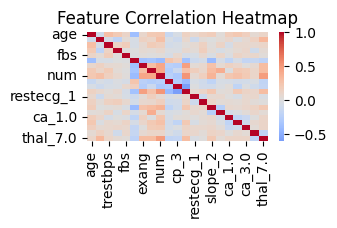

In [17]:
#correlation heatmap

plt.subplot(3, 2, 1)
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix ,annot=False , cmap='coolwarm', center=0,fmt='.2f',cbar_kws={'shrink':1} )
plt.title('Feature Correlation Heatmap')


Text(0.5, 1.0, 'Target Distribution')

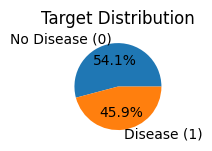

In [18]:
#plot target distribution 
plt.subplot(3, 2, 2)
target_count = df_clean[target_col].value_counts()
plt.pie(target_count.values, labels= [f'No Disease (0)', f'Disease (1)'], autopct ='%1.1f%%')
plt.title('Target Distribution')

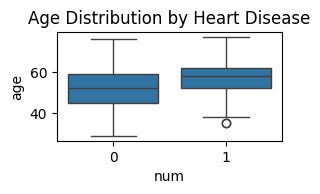

In [19]:
#feature distribution unscaled data
plt.subplot(3, 2, 3)
if 'age' in df_clean.columns:
    sns.boxplot(data=df_clean, x=target_col, y='age')
    plt.title('Age Distribution by Heart Disease')
elif feature_cols_final:
    # Use first available feature
    first_feature = feature_cols_final[0]
    sns.boxplot(data=df_clean, x=target_col, y=first_feature)
    plt.title(f'{first_feature} Distribution by Heart Disease')


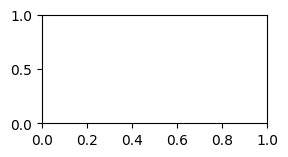

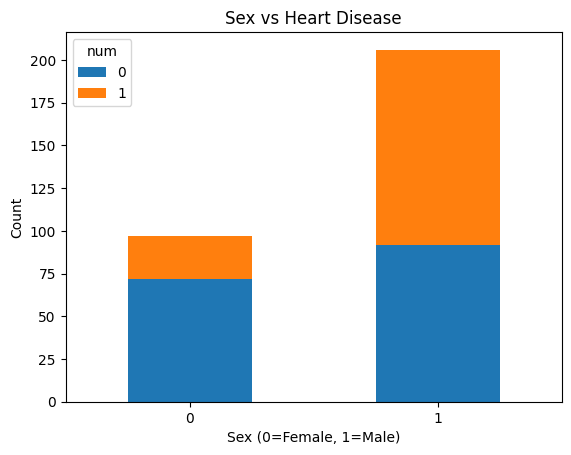

In [20]:
plt.subplot(3, 2, 4)
if 'sex' in df_clean.columns:
    pd.crosstab(df_clean['sex'], df_clean[target_col]).plot(kind='bar', stacked=True)
    plt.title('Sex vs Heart Disease')
    plt.xlabel('Sex (0=Female, 1=Male)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
elif len(feature_cols_final) > 1:
    second_feature = feature_cols_final[1]
    pd.crosstab(df_clean[second_feature], df_clean[target_col]).plot(kind='bar', stacked=True)
    plt.title(f'{second_feature} vs Heart Disease')

Text(0.5, 0, 'Absolute Correlation')

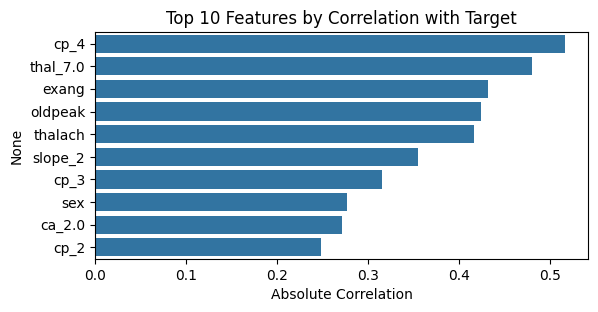

In [21]:
#Feature Importance Preview
plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 5)
feature_corr = df_processed[feature_cols_final].corrwith(df_processed[target_col]).abs().sort_values(ascending=False)
top_corr_features = feature_corr.head(10)
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title('Top 10 Features by Correlation with Target')
plt.xlabel('Absolute Correlation')

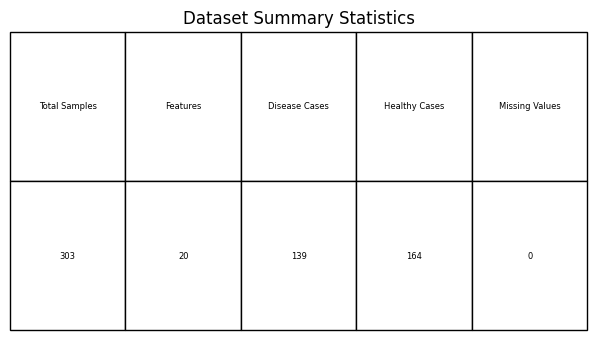

In [22]:
# Dataset summary statistics
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 6)
summary_stats = pd.DataFrame({
    'Total Samples': [len(df_processed)],
    'Features': [len(feature_cols_final)],
    'Disease Cases': [sum(df_processed[target_col])],
    'Healthy Cases': [len(df_processed) - sum(df_processed[target_col])],
    'Missing Values': [df_clean.isnull().sum().sum()]
})
plt.axis('off')
plt.table(cellText=summary_stats.values, colLabels=summary_stats.columns,
          cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
plt.title('Dataset Summary Statistics')

plt.tight_layout()
if not os.path.exists('../results'):
    os.makedirs('../results')
plt.savefig('../results/eda_analysis.png', dpi=2000, bbox_inches='tight')
plt.show()


In [23]:
#saving processed data
df_processed.to_csv('../data/cleaned_heart_disease.csv', index=False)
print(f"\nCleaned dataset saved to '../data/cleaned_heart_disease.csv'")
print(f"Dataset shape: {df_processed.shape}")

# Save dataset metadata
dataset_info = {
    'original_shape': df.shape,
    'final_shape': df_processed.shape,
    'features': feature_cols_final,
    'target_column': target_col,
    'target_distribution': df_processed[target_col].value_counts().to_dict(),
    'missing_values_handled': True,
    'scaling_applied': True,
    'categorical_encoding_applied': len(categorical_features) > 0,
    'categorical_features_encoded': categorical_features
}

import json
with open('../results/dataset_info.json', 'w') as f:
    json.dump(dataset_info, f, indent=2)

print("\nDataset preprocessing completed successfully!")
print(f"- Original dataset: {df.shape}")
print(f"- Processed dataset: {df_processed.shape}")
print(f"- Features: {len(feature_cols_final)}")
print(f"- Target: {target_col}")
print(f"- Files saved: cleaned_heart_disease.csv, dataset_info.json, scaler.pkl")


Cleaned dataset saved to '../data/cleaned_heart_disease.csv'
Dataset shape: (303, 21)

Dataset preprocessing completed successfully!
- Original dataset: (303, 14)
- Processed dataset: (303, 21)
- Features: 20
- Target: num
- Files saved: cleaned_heart_disease.csv, dataset_info.json, scaler.pkl
